In [1]:
import pandas as pd

In [3]:
data = pd.read_excel(r"C:\Users\Haytham ELKADHI\Desktop\DM Project\DB_students.xlsx")

In [299]:
data.head()

Source     Dossier traité par   \
0  Partenaire         Dhouha KOBROSLY   
1      Report         Dhouha KOBROSLY   
2     Interne             Elyes HAJJI   
3     Interne           Feriel Mechri   
4      Report  Mohamed BEN ABDELKADER   

  Date de la demande ( Date d'Inscription) ID Etudiant ( Code Etudiant )   \
0                      2021-02-08 00:00:00                  COGRMNK220498   
1                      2021-05-10 00:00:00                    MARMB050304   
2                      2021-09-16 00:00:00                  COMMDKT110295   
3                      2021-10-10 00:00:00                  COGGDDN200503   
4                      2021-10-27 00:00:00                    MLILS080697   

  Civilité            NOM              Prenom    Date de Naissance  \
0       M   NGOUABI KOUBA         Rod Minishe  1998-04-22 00:00:00   
1       M        BINGMERS            Marouane  2004-05-03 00:00:00   
2       M          TOIHIR  Mohamed Dul-Keyyum  1995-11-02 00:00:00   
3       M          NSONDE   Gustavy Don-Divin  2003-05-20 00:00:00   
4       M            SIBY               Ladji  1997-08-06 00:00:00   

  Pays de residence Nationalité               Email (Email Perso)  \
0         COG Congo  Congolaise       rodminishengouabi@gmail.com   
1       MAR Morocco   Marocaine              moulchi090@gmail.com   
2       COM Comoros  Comorienne  toihirmohameddulkeyyum@gmail.com   
3         COG Congo  Congolaise           gustavynsonde@gmail.com   
4          MLI Mali    Malienne             carterladji@gmail.com   

           Téléphone Ecole (Ecole desirée) Campus (Campus Choix 1)  \
0  +242 06 606 44 76                 ESTYA                   Paris   
1                                    ESTYA                   Paris   
2     +269 438 40 84                 ESTYA                   Paris   
3      +6 46 77 4 48                 ESTYA                   Paris   
4                                    ESTYA                   Paris   

  formation choisie (Formation desirée) Etat de Dossier ( Statut Dossier  )   \
0                                  CDMC                             Passable   
1                               BTS SIO                               Faible   
2                          RNCP 5 : ARH                             Passable   
3                                BTS CG                               Faible   
4                           Mastère MDO                               Faible   

  Niveau de langue (TCF) Décision Equipe admission (Decision Admission )   \
0           Non concerné                                          Accepté   
1           Non concerné                                           Refusé   
2           Non concerné                                          Accepté   
3           Non concerné                                           Refusé   
4           Non concerné                                           Refusé   

          Visa Rentrée scolaire  
0          Oui      Principale   
1                    Principale  
2          NaN          Decalée  
3          NaN       Principale  
4  Sans Retour       Principale

In [306]:
sub_data1 = data[["Civilité","Date de Naissance"]].copy()

In [319]:
sub_data1.rename(columns={'Civilité': 'Gender', 'Date de Naissance':'Birthday'}, inplace=True)

In [320]:
info_gender = sub_data1['Gender'].value_counts()

In [321]:
info_gender

Gender
Male      3413
Female    3156
Name: count, dtype: int64

In [309]:
sub_data1['Gender'] = sub_data1['Gender'].replace({'M': 'Male', 'Mme': 'Female', 'M.': 'Male', 'M ': 'Male' , 'M. ': 'Male', 'm.': 'Male'})

In [310]:
info_gender_new = sub_data1['Gender'].value_counts()

In [311]:
info_gender_new

Gender
Male      3413
Female    3156
Name: count, dtype: int64

In [322]:
info_bday = sub_data1['Birthday'].value_counts()

In [323]:
info_bday

Birthday
2000-01-01    42
1996-05-30     8
1999-10-20     7
1998-01-01     7
2000-07-26     7
              ..
1993-01-25     1
1994-06-24     1
1998-03-22     1
1999-08-22     1
1993-07-19     1
Name: count, Length: 3788, dtype: int64

In [324]:
sub_data1['Birthday'] = pd.to_datetime(sub_data1['Birthday'], errors='coerce')

In [325]:
sub_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6569 entries, 0 to 6568
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Gender    6569 non-null   object        
 1   Birthday  6569 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 102.8+ KB


In [326]:
sub_data1['Birthday'].fillna(pd.to_datetime('2000-01-01'), inplace=True)

In [72]:
print(sub_data1[sub_data1['Birthday'].isna()]) # verify our data dont has any error NAT

Empty DataFrame
Columns: [Gender, Birthday]
Index: []


In [328]:
current_date = pd.to_datetime('today')


In [329]:
sub_data1['Birthday'] = pd.to_datetime(sub_data1['Birthday'])

In [332]:
sub_data1['Age'] =( current_date - pd.to_datetime(sub_data1['Birthday'])).values.astype('<m8[Y]').astype(int)

In [333]:
sub_data1.head()

Gender   Birthday  Age
0   Male 1998-04-22   25
1   Male 2004-05-03   19
2   Male 1995-11-02   28
3   Male 2003-05-20   20
4   Male 1997-08-06   26

In [334]:
info_age = sub_data1['Age'].value_counts()

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

In [337]:
age_stats = sub_data1['Age'].describe()
print(age_stats)

count    6569.000000
mean       25.643172
std         4.634438
min        16.000000
25%        22.000000
50%        25.000000
75%        28.000000
max       134.000000
Name: Age, dtype: float64


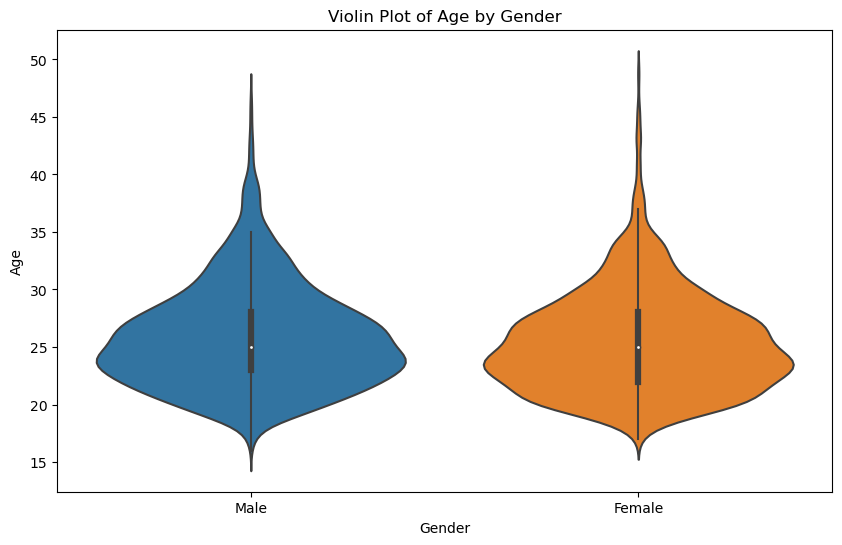

In [152]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Age', data=sub_data1)
plt.title('Violin Plot of Age by Gender')
plt.show()

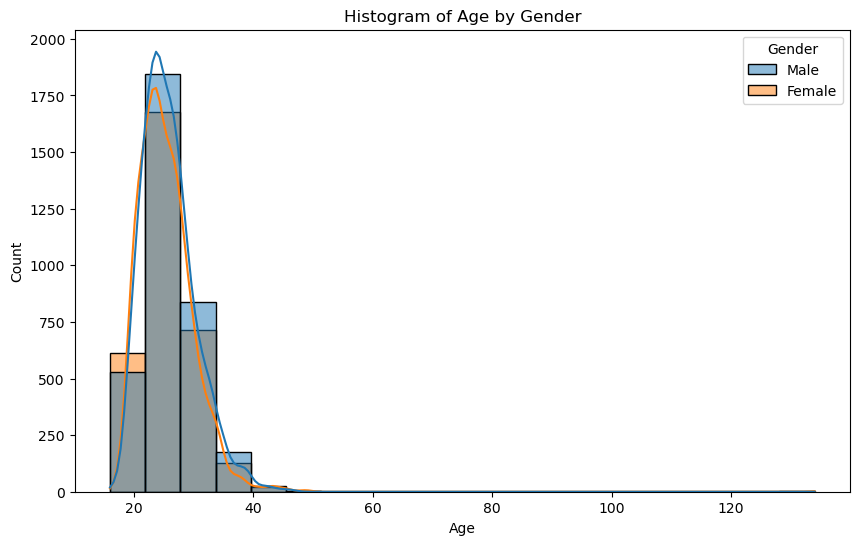

In [338]:
plt.figure(figsize=(10, 6))
sns.histplot(data=sub_data1, x='Age', hue='Gender', bins=20, kde=True)
plt.title('Histogram of Age by Gender')
plt.show()

In [156]:
subdata2 = sub_data1 = data[["Source","Date de la demande ( Date d'Inscription)","Pays de residence"]].copy()

In [157]:
subdata2

Source Date de la demande ( Date d'Inscription) Pays de residence
0      Partenaire                      2021-02-08 00:00:00         COG Congo
1          Report                      2021-05-10 00:00:00       MAR Morocco
2         Interne                      2021-09-16 00:00:00       COM Comoros
3         Interne                      2021-10-10 00:00:00         COG Congo
4          Report                      2021-10-27 00:00:00          MLI Mali
...           ...                                      ...               ...
6564   Partenaire                                26-Jan-23       MAR Morocco
6565   Partenaire                                26-Jan-23       DZA Algeria
6566  EduHorizons                               26-janv-22      CMR Cameroon
6567   Partenaire                                27-Mai-22       SEN Senegal
6568       Report                                      NaN       TUN Tunisia

[6569 rows x 3 columns]

In [161]:
sub_data1.rename(columns={"Date de la demande ( Date d'Inscription)": "Inscription date", "Pays de residence":"country"}, inplace=True)

In [163]:
subdata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6569 entries, 0 to 6568
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Source            6569 non-null   object
 1   Inscription date  6559 non-null   object
 2   country           6566 non-null   object
dtypes: object(3)
memory usage: 154.1+ KB


In [166]:
subdata2['Inscription date'] = pd.to_datetime(subdata2['Inscription date'], format='%d-%b-%y', errors='coerce')

In [167]:
subdata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6569 entries, 0 to 6568
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Source            6569 non-null   object        
 1   Inscription date  6523 non-null   datetime64[ns]
 2   country           6566 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 154.1+ KB


In [168]:
subdata2

Source Inscription date       country
0      Partenaire       2021-02-08     COG Congo
1          Report       2021-05-10   MAR Morocco
2         Interne       2021-09-16   COM Comoros
3         Interne       2021-10-10     COG Congo
4          Report       2021-10-27      MLI Mali
...           ...              ...           ...
6564   Partenaire       2023-01-26   MAR Morocco
6565   Partenaire       2023-01-26   DZA Algeria
6566  EduHorizons              NaT  CMR Cameroon
6567   Partenaire              NaT   SEN Senegal
6568       Report              NaT   TUN Tunisia

[6569 rows x 3 columns]

In [170]:
info_insc = sub_data1['Inscription date'].value_counts()

In [171]:
info_insc

Inscription date
2022-10-21    184
2022-03-10    101
2022-05-23     93
2022-05-09     86
2022-05-24     74
             ... 
2022-07-08      1
2022-09-09      1
2022-10-26      1
2022-10-28      1
2021-02-08      1
Name: count, Length: 324, dtype: int64

Text(0.5, 0, 'Inscription date')

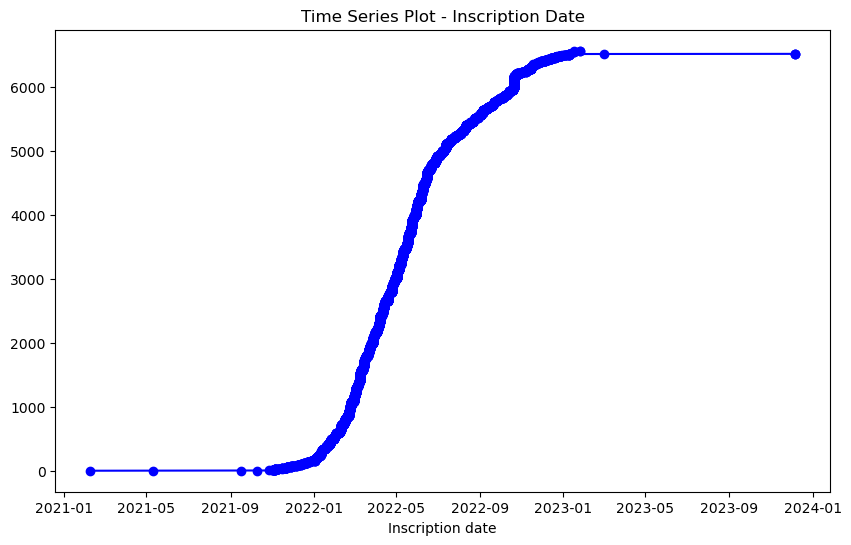

In [177]:
plt.figure(figsize=(10, 6))
plt.plot(subdata2['Inscription date'], subdata2.index, marker='o', linestyle='-', color='b')
plt.title('Time Series Plot - Inscription Date')
plt.xlabel('Inscription date')

In [178]:
subdata2['Month'] = sub_data1['Inscription date'].dt.month
subdata2['Year'] = sub_data1['Inscription date'].dt.year

In [179]:
inscription_counts = subdata2.groupby(['Year', 'Month']).size().reset_index(name='Count')

<BarContainer object of 21 artists>

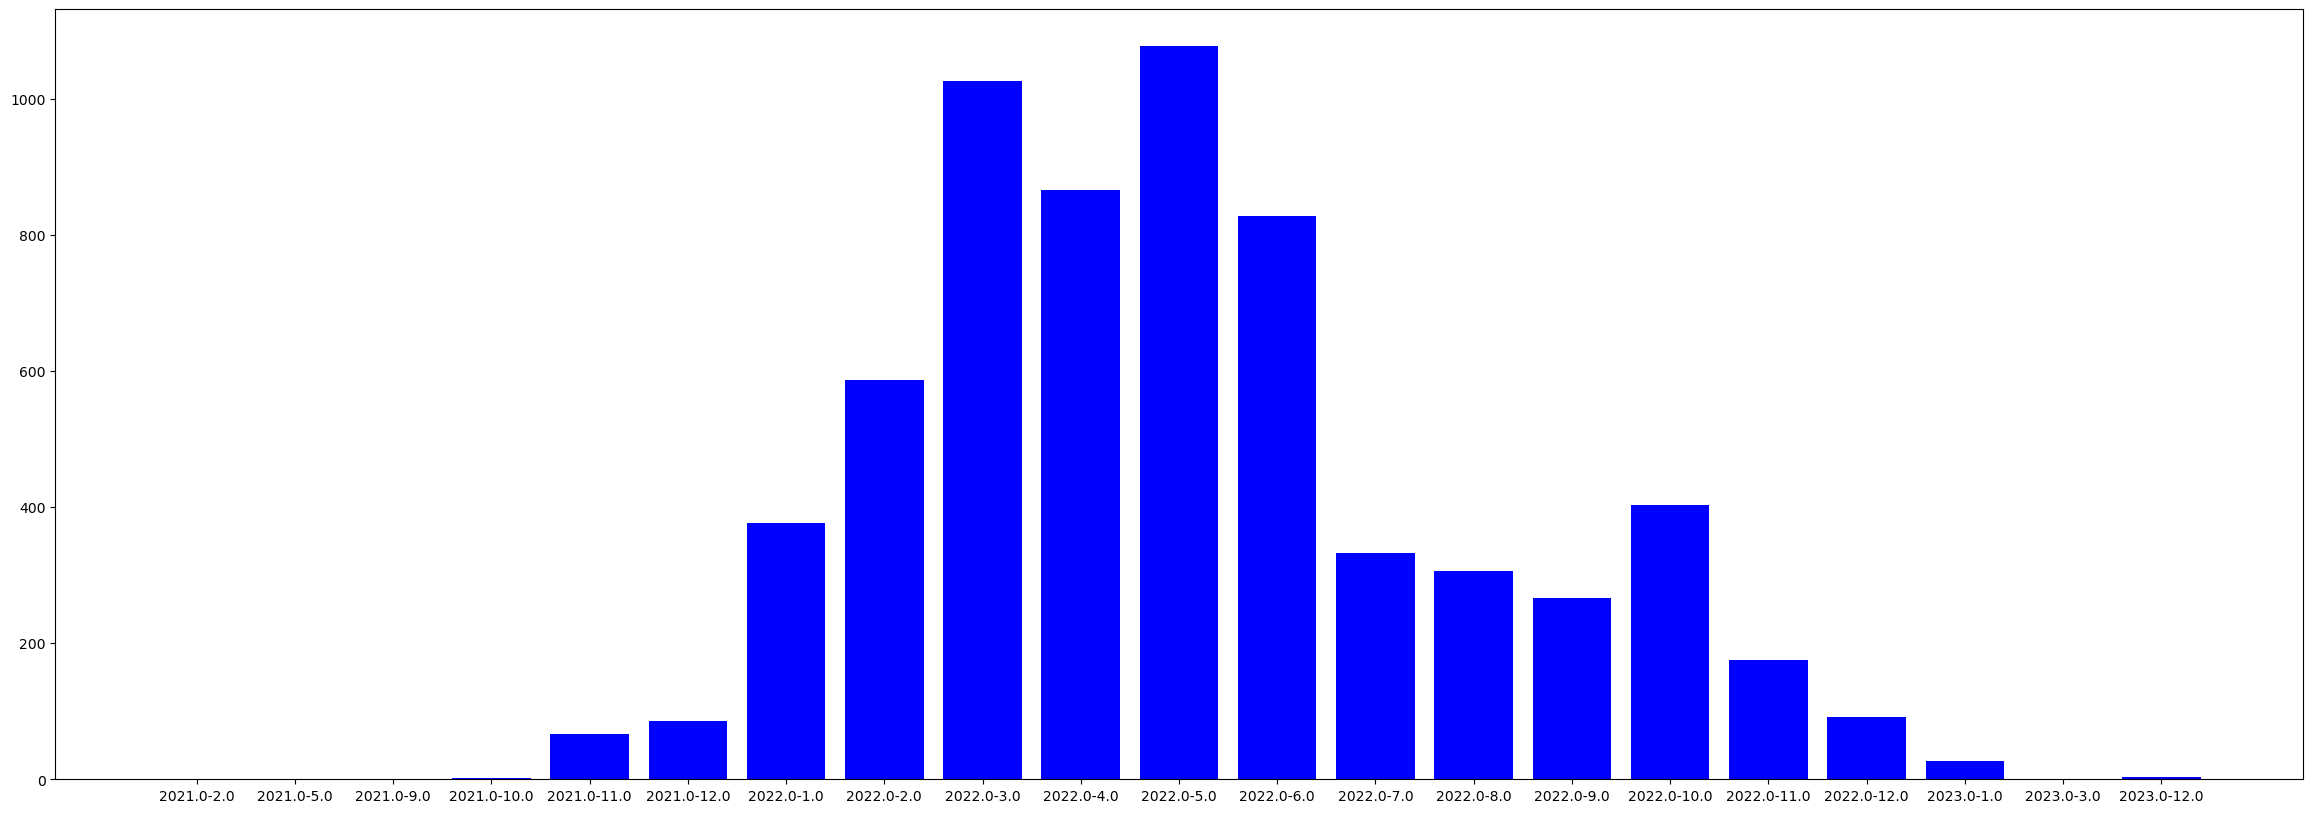

In [183]:
plt.figure(figsize=(29, 10))
plt.bar(inscription_counts['Year'].astype(str) + '-' + inscription_counts['Month'].astype(str), inscription_counts['Count'], color='blue')

In [243]:
import seaborn as sns
import matplotlib.pyplot as plt

In [213]:
top_countries = subdata2['country'].value_counts().nlargest(10).index

In [244]:
sub_data_top_countries = subdata2[subdata2['country'].isin(top_countries)]